In [211]:
# Import packages needed for the project

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [5]:
# Read in the data
df = pd.read_csv(r'C:\Users\Gerald\Desktop\python result\clean_Automibile_data.csv')

df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low


The objective of this project, is to explore the car features and identify those that have the most impact on a car price. The will be accomplished using visualization and descriptive statistical analysis.

#####  **Analyzing Individual Feature Patterns Using Visualization**

 a) Numeric Features
       

In [19]:
# Create four separate dataframes of numeric features and the taget variable (price). 

NFeatures1 = df[['horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price']]

NFeatures2 = df[['length', 'width', 'height', 'curb-weight', 'price']]

NFeatures3 = df[['engine-size', 'bore', 'stroke', 'compression-ratio', 'price']]

NFeatures4 = df[['symboling', 'normalized-losses','wheel-base','price']]


Let's examine the relationship between features and the taget variable (price) 

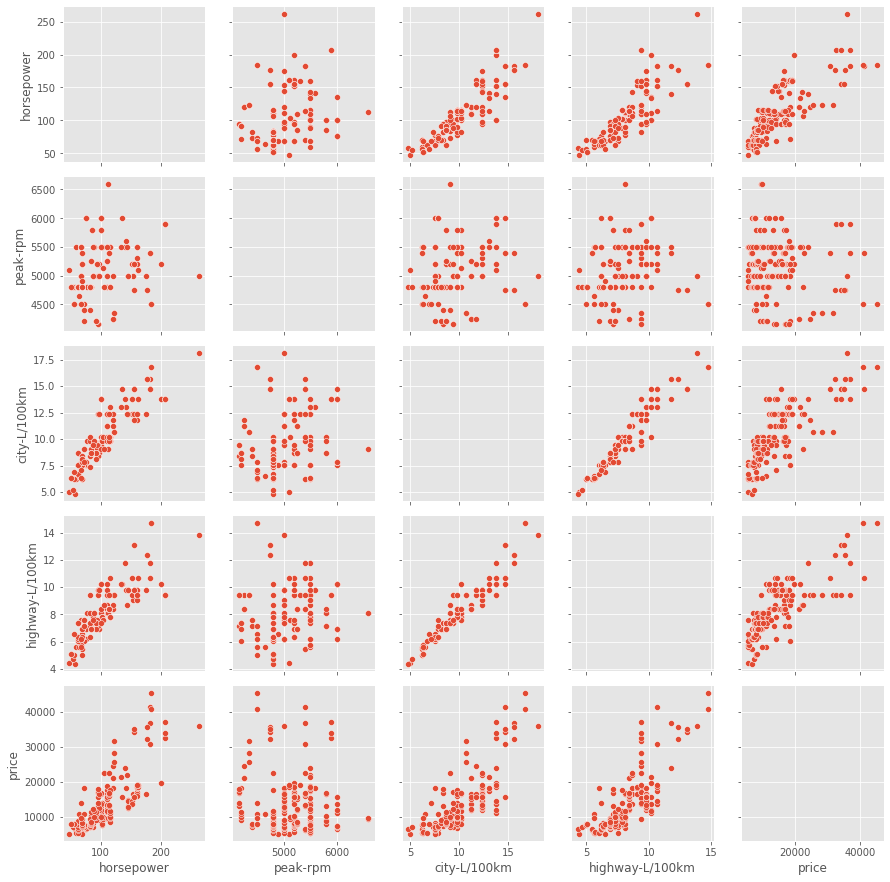

In [20]:
# Examining the first set of features 
g = sns.PairGrid(NFeatures1)
g.map_offdiag(sns.scatterplot)


* As horsepower goes up, city-L/100Km, highway-L/100Km, and price go up. 
 
This suggests a positive direct correlation between the variables. The Horsepower, city-L/100Km, and highway-L/100Km features seem like pretty good predictors of price. 

Peak rpm does not seem like a good predictor of the price since the data points are very scattered, showing lots of variability. Therefore, it's not a reliable variable.

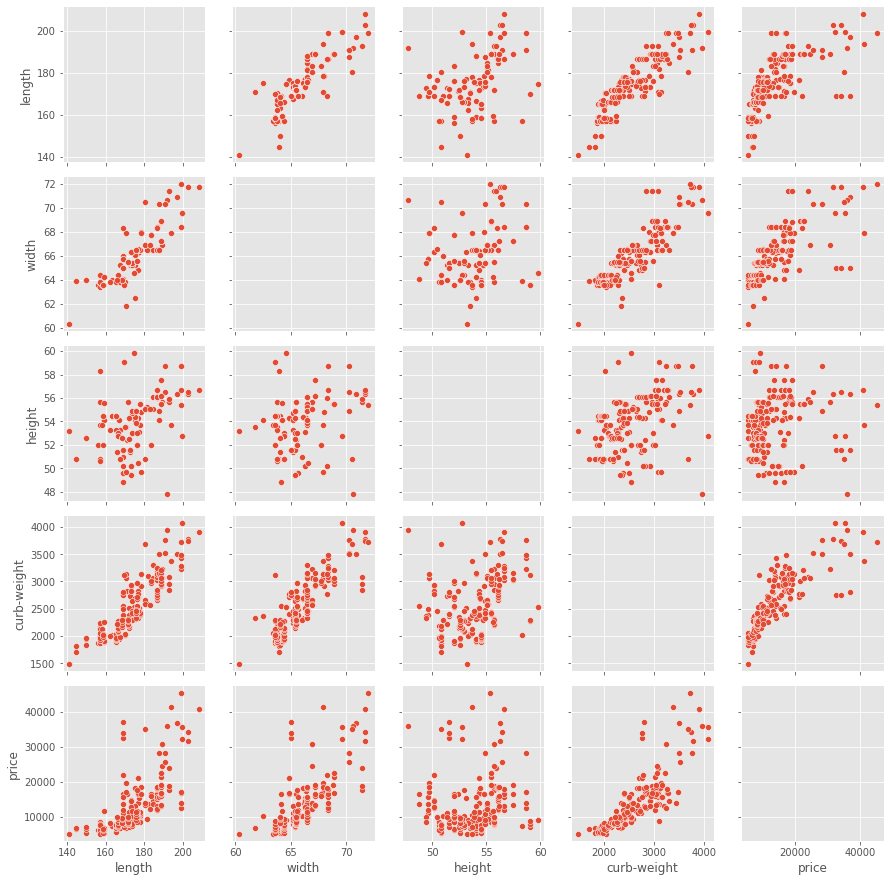

In [21]:
# Examining the second set of features 
g = sns.PairGrid(NFeatures2)
g.map_offdiag(sns.scatterplot)


Here, curb-weight seems to be a good predictor of price. And both features also appear to be correlated. Width and curb-weight also appear to be correlated to length.

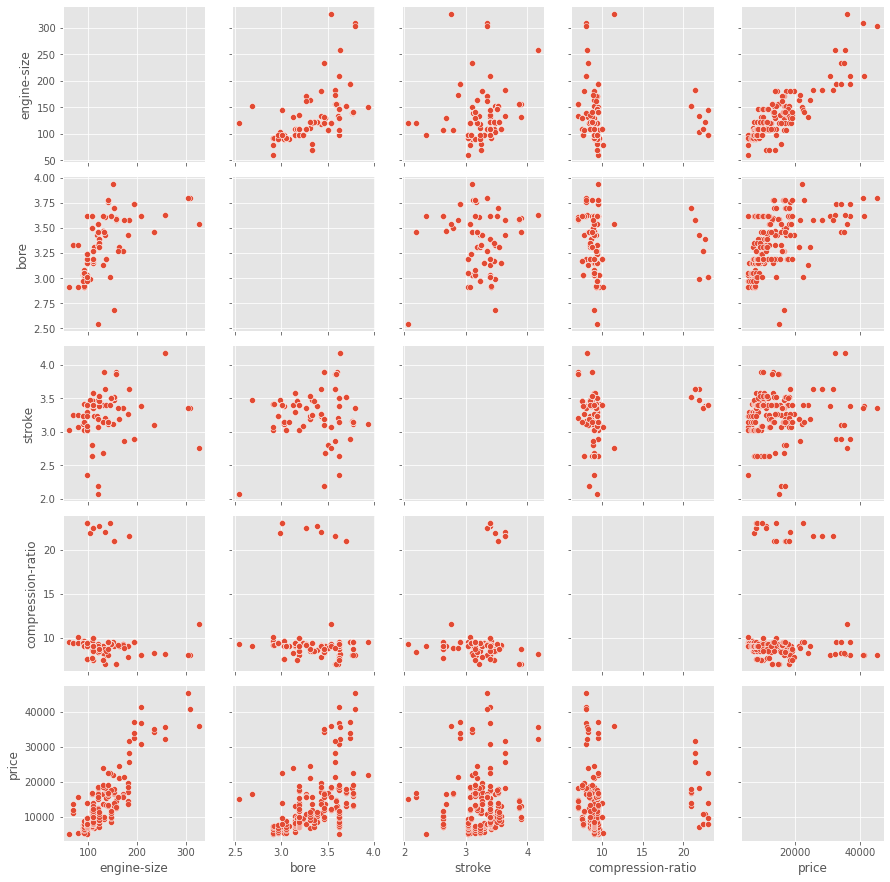

In [22]:
# Examining the third set of features 
g = sns.PairGrid(NFeatures3)
g.map_offdiag(sns.scatterplot)


Engine-size and bore seem to be a good predictors of price. 

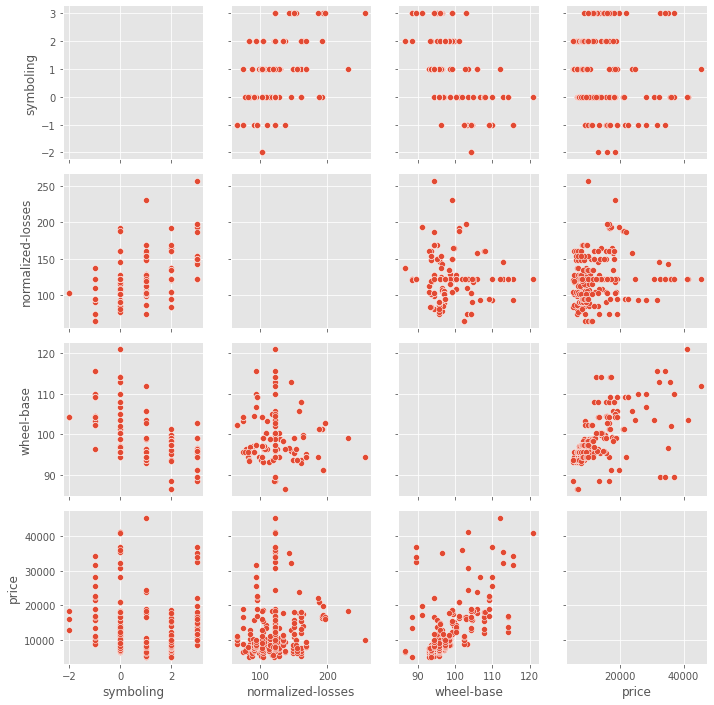

In [23]:
# Examining the fourth set of features 
g = sns.PairGrid(NFeatures4)
g.map_offdiag(sns.scatterplot)


wheel-base seems to be a good predictor of price.

b) Categorical Features

In [204]:
# create dataframe of categorical variables and price

Charfeatures_df = df.select_dtypes(include="object")
del Charfeatures_df["horsepower-binned"]
price_df = df[['price']]
Combined_df =  pd.concat([Charfeatures_df, price_df], axis=1)

Combined_df.head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


I will now create boxplots of price grouped by each categorical variable

<AxesSubplot:xlabel='make', ylabel='price'>

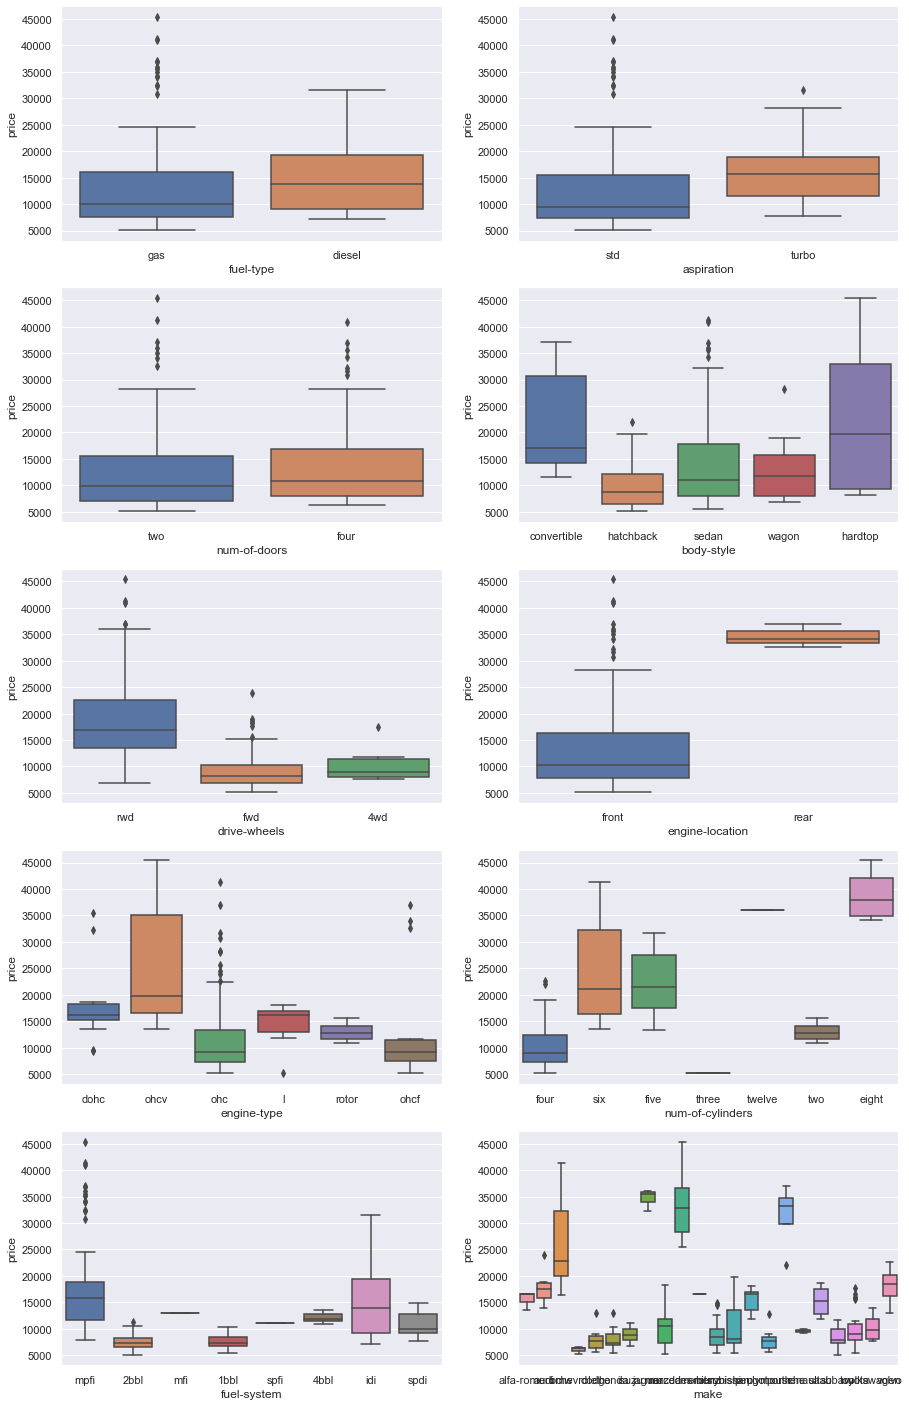

In [205]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region 
fig, axes = plt.subplots(5, 2, figsize=(15,25))

#fig.suptitle('5 rows x 2 columns axes with no data')

#create boxplot in each subplot
sns.boxplot(data=Combined_df, x='fuel-type', y='price', ax=axes[0,0])
sns.boxplot(data=Combined_df, x='aspiration', y='price', ax=axes[0,1])
sns.boxplot(data=Combined_df, x='num-of-doors', y='price', ax=axes[1,0])
sns.boxplot(data=Combined_df, x='body-style', y='price', ax=axes[1,1])
sns.boxplot(data=Combined_df, x='drive-wheels', y='price', ax=axes[2,0])
sns.boxplot(data=Combined_df, x='engine-location', y='price', ax=axes[2,1])
sns.boxplot(data=Combined_df, x='engine-type', y='price', ax=axes[3,0])
sns.boxplot(data=Combined_df, x='num-of-cylinders', y='price', ax=axes[3,1])
sns.boxplot(data=Combined_df, x='fuel-system', y='price', ax=axes[4,0])
sns.boxplot(data=Combined_df, x='make', y='price', ax=axes[4,1])


We see that the distribution of price between the different fuel-type categories have a significant overlap, so fuel-type would not be a good predictor of price. Based on the same obsevation, aspiration, num-of-doors, engine-location, engine-type, num-of-cylinders, fuel-system, make, and body-style  would also not be good predictors of price. 

However, the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price. The same observation could be made for engine-location. 


##### **Descriptive Statistical Analysis** 

 a) Categorical Features

In [96]:
# compute basic statistics for all the variables of type 'object' 
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,181,165,115,94,118,198,145,157,92,153


Understanding the number of units of each variable we have can shed more light on their potential as good predictor variables for price.

In [107]:
# Value Count of drive-wheels

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts



,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [104]:
# Value Count of engine-location

engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of all the potential categorical predictors, we can see that engine location would not be a good predictor variable for the price. This is so because the result is skewed in favor of front-engine location with only three cars having a rear engine and 198 with a front-engine. Thus, we are not able to draw any meaningful conclusion about the engine location.

b) Numerical Features

Here we will look at **Pearson Correlation** which measures the linear dependence between the numeric features and price. We want to identify the numeric features which have the most impact on the car price.

In [209]:
# Correlarion estimates of numeric features and price

Num_Features = df.select_dtypes(exclude="object")

del Num_Features["city-mpg"]
del Num_Features["highway-mpg"]
del Num_Features["Unnamed: 0"]

correlation_matrix = Num_Features .corr(method='pearson')
correlation_matrix


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.082391,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.133999,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.584642,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.690628,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.751265,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.135486,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.834415,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.872335,0.745059,0.783465
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.543155,0.554610,0.559112
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.082269,0.036133,0.047089


We can also plot the heatmap of this matrix

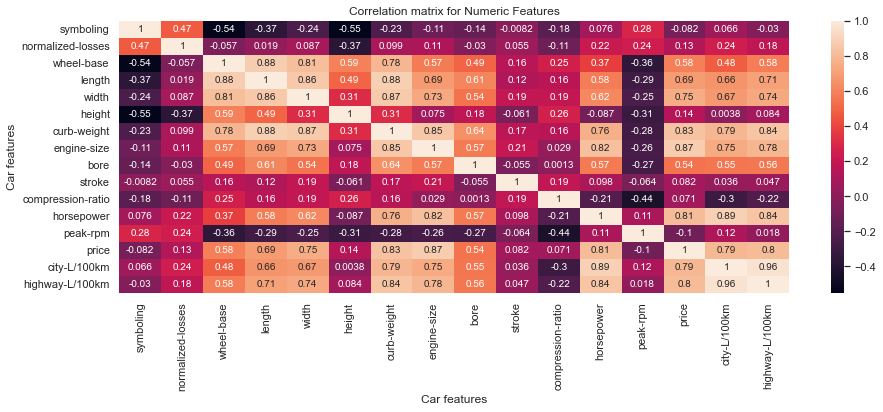

In [228]:
# Heat map of Correlarion estimates of numeric features and price

Num_Features = df.select_dtypes(exclude="object")

del Num_Features["city-mpg"]
del Num_Features["highway-mpg"]
del Num_Features["Unnamed: 0"]

correlation_matrix = Num_Features .corr(method='pearson')
plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Car features")
plt.ylabel("Car features")
plt.show()

We can now take a look at only features that have high correlation (i.e., corr > $ | 0.5 | $) with price 

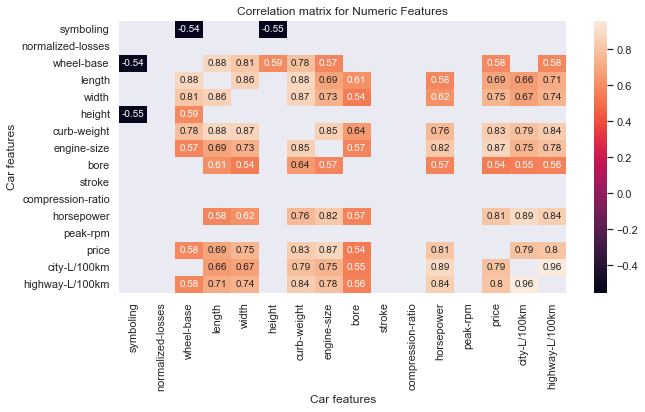

In [231]:
Num_Features = df.select_dtypes(exclude="object")

del Num_Features["city-mpg"]
del Num_Features["highway-mpg"]
del Num_Features["Unnamed: 0"]

dfCorr = Num_Features.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(10,5))
sns.heatmap(filteredDf, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Car features")
plt.ylabel("Car features")
plt.show()


Width, curb-weight, engine-size, horsepower, city-L/100 Km, and highway-L/100 Km shhow a quite strong positive linear relationship (corr > 0.7) with price.

Wheel-base and length shows a moderately strong positive linear relationship (0.5 <= corr <= 0.7) with price. 

Next we look at the statistical significance of the correlation estimates using the P-value. 
By convention, when the 
*	p-value is << 0.001: we say there is strong evidence that the correlation is significant.
*	the p-value is << 0.05: there is moderate evidence that the correlation is significant.
*	the p-value is << 0.1: there is weak evidence that the correlation is significant.
*	the p-value is >> 0.1: there is no evidence that the correlation is significant.


In [135]:
# Horsepower vs. Price

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.8096068016571053  with a P-value of P =  6.273536270650683e-48


In [136]:
# city-L/100 Km vs. Price

pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.7898975136626942  with a P-value of P =  3.903106400939858e-44


In [137]:
# Highway-L/100 Km vs. Price

pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.8011176263981972  with a P-value of P =  3.0467845810416295e-46


In [138]:
# length Km vs. Price

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158759e-30


In [139]:
# width vs. Price

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.7512653440522675  with a P-value of P =  9.200335510481123e-38


In [140]:
# height vs. Price

pearson_coef, p_value = stats.pearsonr(df['height'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)



The Pearson Correlation Coefficient is 0.13548630756805968  with a P-value of P =  0.055146273251013435


In [141]:
# curb-weight vs. Price

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


In [142]:
# engine-size vs. Price

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.8723351674455181  with a P-value of P =  9.265491622201286e-64


In [143]:
# bore vs. Price

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =  8.049189483935261e-17


In [144]:
# stroke vs. Price

pearson_coef, p_value = stats.pearsonr(df['stroke'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.0822692885532581  with a P-value of P =  0.24561612487745918


In [145]:
# compression-ratio vs. Price

pearson_coef, p_value = stats.pearsonr(df['compression-ratio'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.07110732668194145  with a P-value of P =  0.3158110188729282


In [146]:
# symboling vs. Price

pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is -0.08239118716962361  with a P-value of P =  0.2449148765716521


In [147]:
# normalized-losses vs. Price

pearson_coef, p_value = stats.pearsonr(df['normalized-losses'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.13399873429274334  with a P-value of P =  0.05789749352703121


In [148]:
# wheel-base vs. Price

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)


The Pearson Correlation Coefficient is 0.5846418222655079  with a P-value of P =  8.076488270733275e-20


#### **Conclusion:** Important Variables for car price

Based on our data, we now have a better idea of which features have the most impact on a car price. We narrowed it down to the following features: 
*	Length
*	Width
*	Curb-weight
*	Engine-size
*	Horsepower
*	City-mpg
*	Highway-mpg
*	Wheel-base
*	Bore
*	Drive-wheels
